In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 1位の店が選ばれる最適点(一般的な秘書問題)

In [49]:
def choose_candidate(n, reject=np.e):
    # 飯屋のランキング
    candidates = np.arange(1, n+1)
    
    #順番シャッフル
    np.random.shuffle(candidates)
    
    #探索→活用の切り替え点
    if reject == np.e:
        stop = int(round(n/reject))
    else:
        stop = int(round(reject*n/100))

    #活用フェイズで最も順位の良い店
    best_from_rejected = np.min(candidates[:stop])
    rest = candidates[stop:]
    
    try:
        return rest[rest < best_from_rejected][0] #活用フェイズで一番最初にbest_from_rejectedを下回る店を採用
    except IndexError:
        return candidates[-1] #該当者がいない場合は最後の店を採用

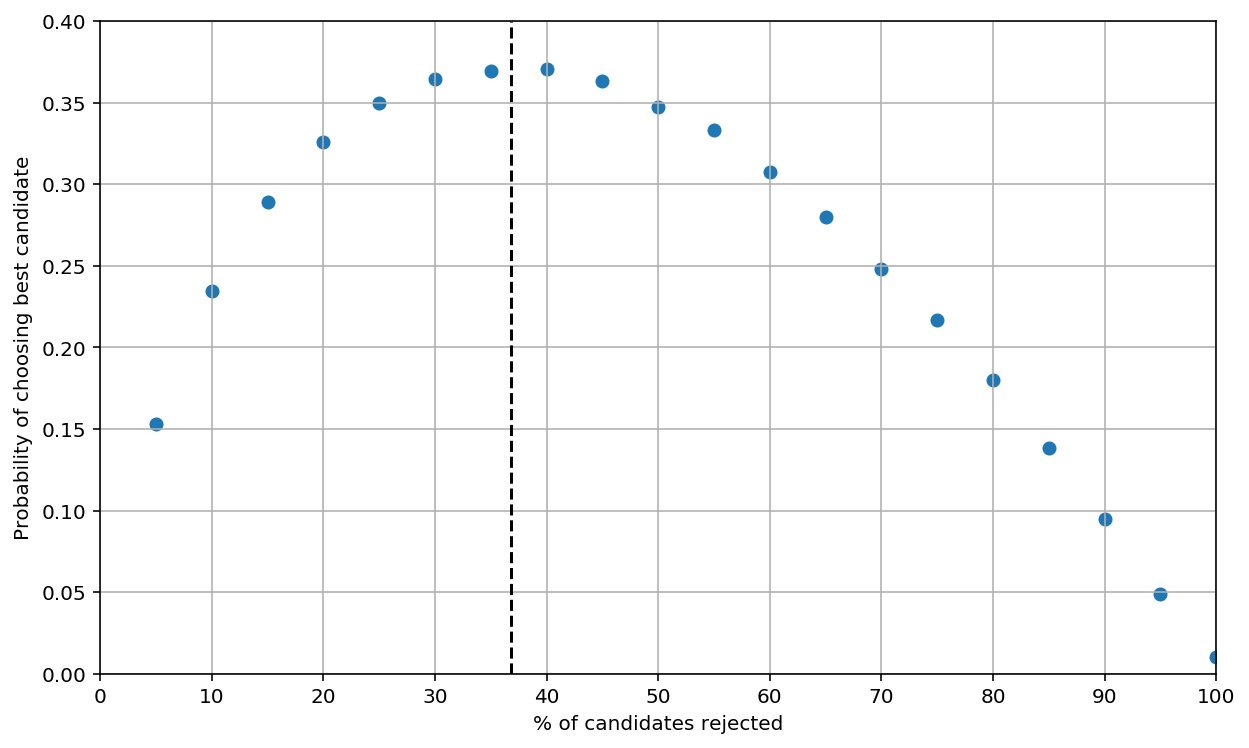

In [50]:
best_candidate = []
for r in range(5, 101, 5):
    sim = np.array([choose_candidate(n=100, reject=r) for i in range(100000)])
    # np.histogram counts frequency of each candidate
    best_candidate.append(np.histogram(sim, bins=100)[0][0]/100000)

plt.figure(figsize=(10, 6))
plt.scatter(range(5, 101, 5), best_candidate)
plt.xlim(0, 100)
plt.xticks(np.arange(0, 101, 10))
plt.ylim(0, 0.4)
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidate')
plt.grid(True)
plt.axvline(100/np.e, ls='--', c='black')
plt.show()

# n位以内の店が選ばれる最適点

In [51]:
def get_best_candidates(best_n=1):
    '''Return a list of probabilities for different rejection strategies and specify what percentage of the
    best candidates we want to select.'''
    
    best_candidate = []
    #for c in [1] + range(5, 101, 5):
    for c in range(5, 101, 5):
        sim = np.array([choose_candidate(100, reject=c) for i in range(10000)])
        best_candidate.append(len(sim[sim <= best_n])/100)
        
    return best_candidate


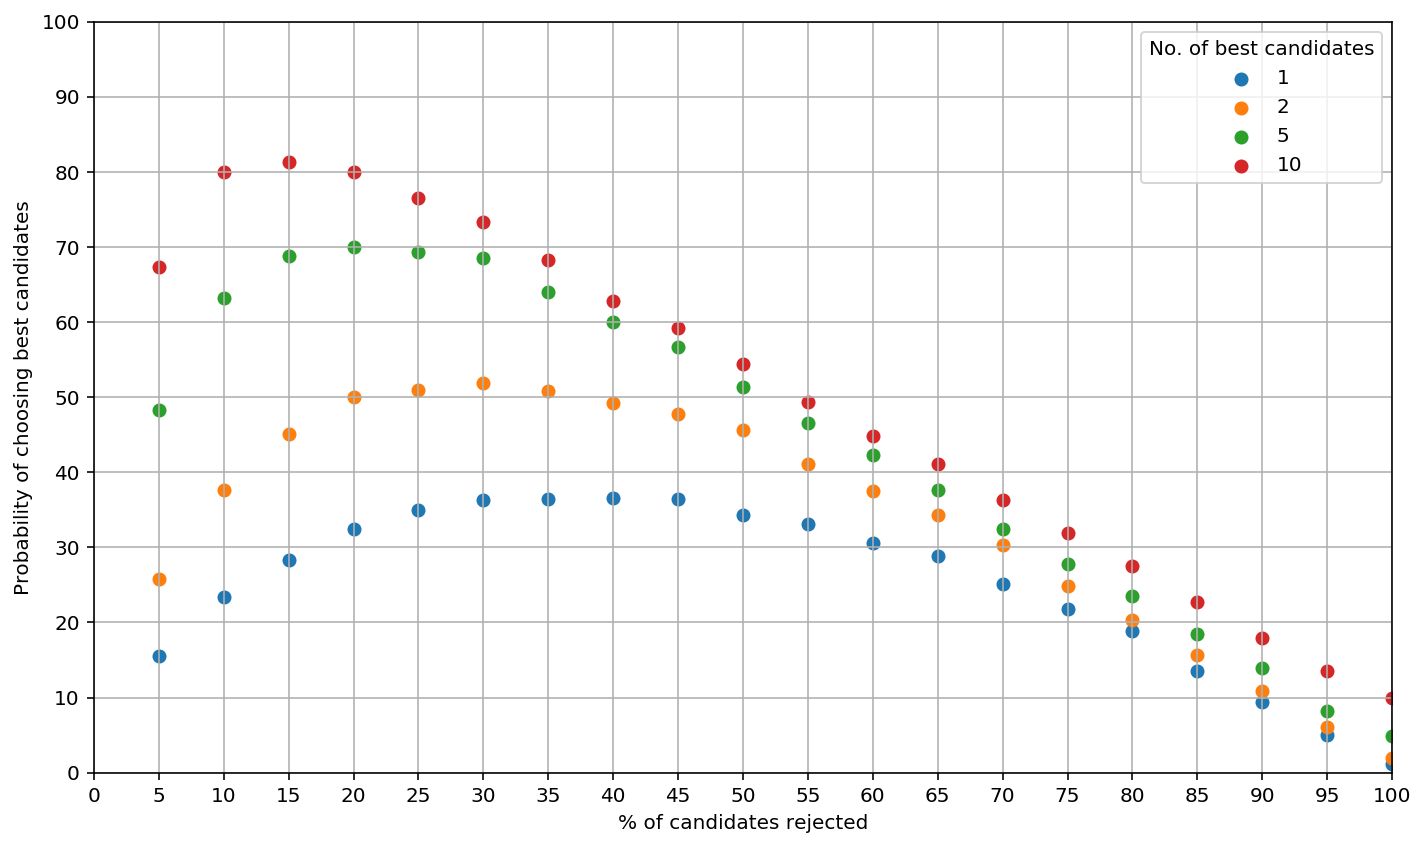

In [52]:
plt.figure(figsize=(10, 6))
for i in [1, 2, 5, 10]:
    plt.scatter(range(5, 101, 5), get_best_candidates(i), label=str(i))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, 101, 10))
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidates')
plt.legend(title='No. of best candidates')
plt.grid(True)
plt.tight_layout()
plt.show()

# 複数店舗選ぶ場合に最適な店が含まれる最適点

In [53]:
def choose_candidate(n, c, reject=np.e):
    # 飯屋のランキング
    candidates = np.arange(1, n+1)
    
    #順番シャッフル
    np.random.shuffle(candidates)
    
    #観察→採用の切り替え点
    if reject == np.e:
        stop = int(round(n/reject))
    else:
        stop = int(round(reject*n/100))

    #観察フェイズで最も順位の良い候補点
    best_from_rejected = np.min(candidates[:stop])
    rest = candidates[stop:]
    
    #c人を選出、その中にtopがいるか？
    candidatelist=rest[rest < best_from_rejected][:c]
    noncandidatelist=rest[rest >= best_from_rejected]
    
    num=1
    while len(candidatelist)<c:
        candidatelist=np.append(candidatelist,noncandidatelist[-num])
        num+=1
    
    #c人中最良の候補者を返す
    return min(candidatelist)

In [54]:
def get_best_candidates(best_n=1):
    '''Return a list of probabilities for different rejection strategies and specify what percentage of the
    best candidates we want to select.'''
    
    best_candidate = []
    for c in [1]+[i for i in range(5, 91, 5)]:
        sim = np.array([choose_candidate(100, best_n, reject=c) for i in range(10000)])
        best_candidate.append(len(sim[sim <= 1])/100)
        
    return best_candidate

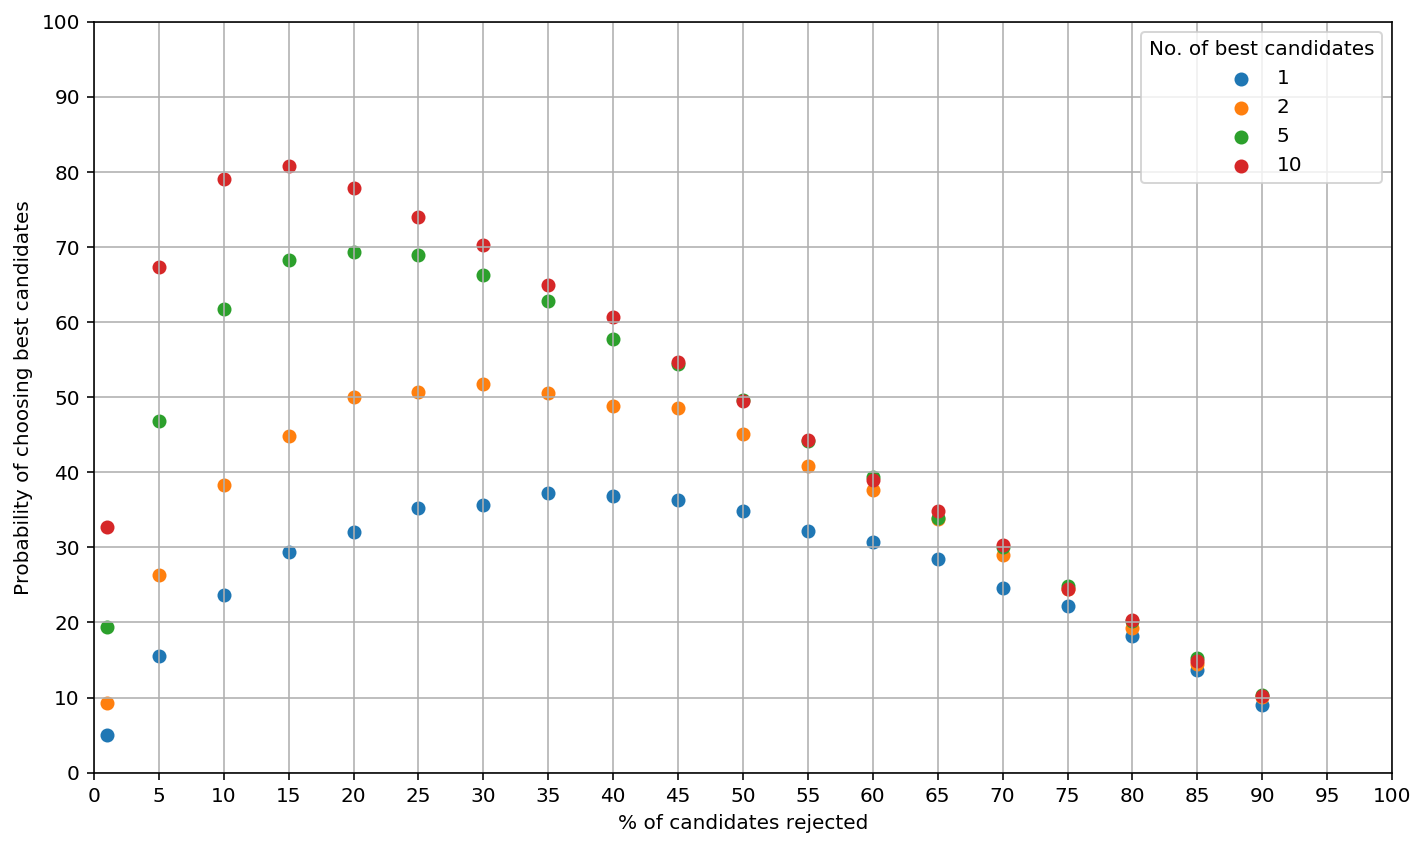

In [55]:
plt.figure(figsize=(10, 6))
for i in [1, 2, 5, 10]:
    plt.scatter([1]+[i for i in range(5, 91, 5)], get_best_candidates(i), label=str(i))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, 101, 10))
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidates')
plt.legend(title='No. of best candidates')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5店舗を選ぶ場合の合計値の最適点

In [56]:
def choose_candidate(n, c, reject=np.e):
    # 飯屋のランキング
    candidates = np.arange(1, n+1)
    
    #順番シャッフル
    np.random.shuffle(candidates)
    
    #観察→採用の切り替え点
    if reject == np.e:
        stop = int(round(n/reject))
    else:
        stop = int(round(reject*n/100))

    #観察フェイズで最も順位の良い候補点
    best_from_rejected = np.min(candidates[:stop])
    rest = candidates[stop:]
    
    #c人を選出、その中にtopがいるか？
    candidatelist=rest[rest < best_from_rejected][:c]
    noncandidatelist=rest[rest >= best_from_rejected]
    
    num=1
    while len(candidatelist)<c:
        candidatelist=np.append(candidatelist,noncandidatelist[-num])
        num+=1
        
    #候補者の合計値を返す
    return sum(candidatelist)

In [57]:
def get_best_candidates(th,best_n=1):
    '''Return a list of probabilities for different rejection strategies and specify what percentage of the
    best candidates we want to select.'''
    
    best_candidate = []
    #for c in [1] + range(5, 101, 5):
    #for c in range(5, 101, 5):
    for c in [1]+[i for i in range(5, 91, 5)]:
        sim = np.array([choose_candidate(100, best_n, reject=c) for i in range(10000)])
        best_candidate.append(len(sim[sim <= th])/100)
    #return sim   
    return best_candidate

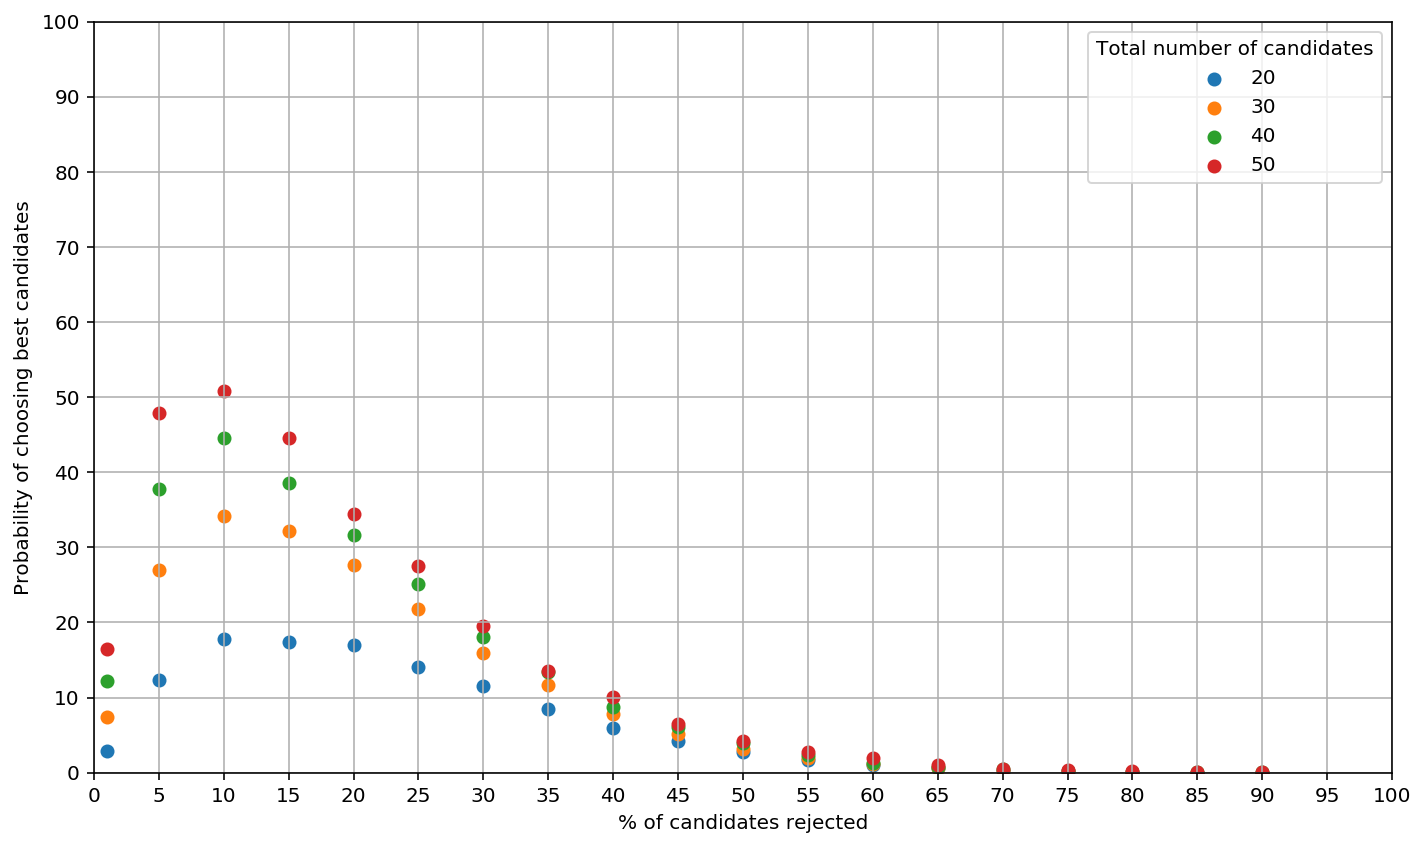

In [58]:
plt.figure(figsize=(10, 6))
#for i in [1, 2, 5, 10]:
for i in [20, 30, 40, 50]:
    plt.scatter([1]+[i for i in range(5, 91, 5)], get_best_candidates(i,best_n=5), label=str(i))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, 101, 10))
plt.xlabel('% of candidates rejected')
plt.ylabel('Probability of choosing best candidates')
plt.legend(title='Total number of candidates')
plt.grid(True)
plt.tight_layout()
plt.show()